In [353]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [354]:
unitTime_in_Myrs = 0.07675 # Myrs
UnitDensity_in_cgs = 2.554e-18
UnitRadius_in_cm =  9.2e+16
unitVelocity =  37984.06

In [355]:
jj = 1235   # 1219 =====> 1e-13

nam = 'snap_' + str(jj).zfill(3) + '.hdf5'

file = h5py.File('/mnt/Linux_Shared_Folder_2022/GPU_sph/200k_Gad_Commercon/' + nam, 'r')

## Getting the proper time of the snapshot

In [356]:
df_info = pd.read_csv('/mnt/Linux_Shared_Folder_2022/GPU_sph/200k_Gad_Commercon/infox.csv')
x7 = df_info['x7'].values
n7 = np.where(x7 == 200000)[0]

t_arr = df_info['x3'].values

t = t_arr[n7][jj]
print('Current time in code unit = ', t)
print()
print(f'Current time in kyrs = {t*unitTime_in_Myrs*1000:.3f}')
print()
print(f'Number of Snapshots = ', len(n7))


#df_info.head()

Current time in code unit =  1.20605

Current time in kyrs = 92.564

Number of Snapshots =  1300


In [357]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [358]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [359]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [360]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (200000, 3), type "<f4">

In [361]:
vel = file['PartType0']['Velocities']
np.sort((vel[:, 0]))

array([-3.6215189, -3.6067183, -3.6009753, ...,  3.5551078,  3.6488352,
        3.669317 ], dtype=float32)

(-1.0, 1.0)

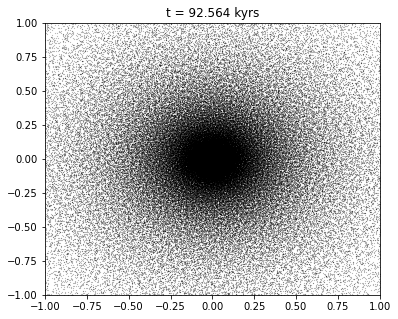

In [362]:
plt.figure(figsize = (6, 5))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.01, color = 'black')

plt.title(f't = {round(t*unitTime_in_Myrs*1000, 3)} kyrs')

xyrange = 1.0

plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange)

In [363]:
h = np.array(file['PartType0']['SmoothingLength'])

np.min(h), np.max(h), np.median(h)

(0.0005580961, 1.7076873, 0.079235315)

In [364]:
v = np.array(file['PartType0']['Velocities'])

In [365]:
delta = 0.1

x = coord[:, 0]
y = coord[:, 1]
z = coord[:, 2]

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

rx = x[nz]
ry = y[nz]
rz = z[nz]

vt = v[nz]

68387


(-1.0, 1.0)

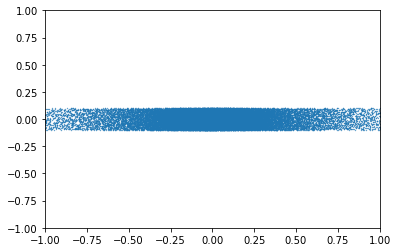

In [366]:
plt.scatter(rx, rz, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [367]:
radius = (rx*rx + ry*ry + rz*rz)**0.5

vr = (vt[:, 0]*rx + vt[:, 1]*ry + vt[:, 2]*rz)/radius

In [368]:
logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

In [369]:
res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(vr[nx])])

res = np.array(res)

In [370]:
R = res[:, 0] * UnitRadius_in_cm
vr = res[:, 1] * unitVelocity

In [371]:
print(f'currentTime = {round(currentTime*1000, 3)} kyrs.')

currentTime = 949.398 kyrs.


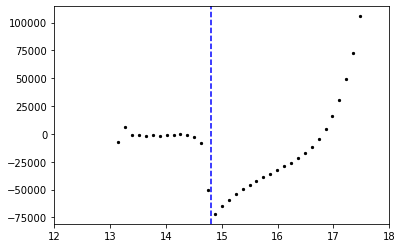

In [372]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k')
plt.axvline(x = 14.8, color = 'blue', linestyle='--')
plt.xlim(12, 18);

In [373]:
with open('R_vs_vr_hfvSPH.pkl', 'rb') as f:
    dictx = pickle.load(f)

R_hfv = dictx['R']
vr_hfv = dictx['vr']

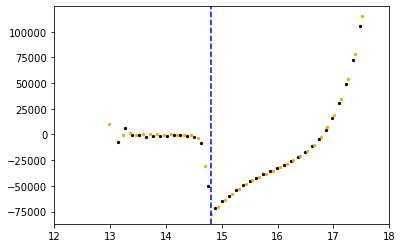

In [374]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k')
plt.scatter(np.log10(R_hfv), vr_hfv, s = 5, color = 'orange')
plt.axvline(x = 14.8, color = 'blue', linestyle='--')
plt.xlim(12, 18);

In [375]:
rho = np.array(list(file['PartType0']['Density']))
np.sort(rho) * UnitDensity_in_cgs

array([4.1335251e-23, 4.4340158e-23, 4.5006566e-23, ..., 1.0680407e-12,
       1.0778009e-12, 1.0828824e-12], dtype=float32)